# 1. LOADING DATA AND PERFORMING BASIC CLEANING.

### A. Importing required Libraries.

In [ ]:
#Importing the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### B. Loading the Dataset.

In [ ]:
# Loading the dataset

data = pd.read_excel('mobile_usage_ng.xlsx')

# Viewing the head of the dataset
data.head()

,user_id,state,age,monthly_data_mb,app_downloads,spending_ngn
0,USER0001,OYO,21.0,13773,18,19690.0
1,USER0002,Anambra,34.0,11230,11,NaN
2,USER0003,Oyo,29.0,22768,36,32221.0
3,USER0004,Lagos,25.0,15322,41,14204.0
4,USER0005,Oyo,22.0,23769,16,2623.0


In [ ]:
# Checking the dimensions of the dataset

data.dtypes

,0
user_id,object
state,object
age,float64
monthly_data_mb,int64
app_downloads,int64
spending_ngn,float64


---

## C. Cleaning the Dataset.

In [ ]:
# Renaming the columns
#data = data.rename(columns = {'user_id': 'User ID', 'state': 'State', 'age': 'Age', 'monthly_data_mb': 'Monthly Data (MB)', 'app_downloads': 'App Downloads',
       #'spending_ngn': 'Spending (NGN)'})
#data.head(5)

data.columns = ['User ID', 'State', 'Age', 'Monthly Data (MB)', 'App Downloads', 'Spending (NGN)']

# Standardizing State names to start with Capital letters
data['State'] = data['State'].str.title()

data.tail()

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)
1995,USER1996,Lagos,18.0,9921,21,4166.0
1996,USER1997,Kaduna,21.0,5932,0,37545.0
1997,USER1998,Enugu,15.0,12920,19,21286.0
1998,USER1999,Kaduna,26.0,16311,21,6015.0
1999,USER2000,Kano,27.0,7222,47,NaN


In [ ]:
print(data["State"].unique())

['Oyo' 'Anambra ' 'Oyo ' 'Lagos ' 'Anambra' 'Kano' 'Kaduna' 'Kano '
 'Kaduna ' 'Enugu' 'Lagos' 'Enugu ']


In [ ]:
data["State"] = data["State"].str.strip()
print(data["State"].unique())

['Oyo' 'Anambra' 'Lagos' 'Kano' 'Kaduna' 'Enugu']


In [ ]:
# First checking if missing values exist in the dataset
data.isnull().sum()  # Checking the missing values.

,0
User ID,0
State,0
Age,103
Monthly Data (MB),0
App Downloads,0
Spending (NGN),104


In [ ]:
# Checking the dataset for errors & missing values

misVal = data.isnull().sum()  # Count missing values per column
misVal = misVal[misVal > 0]   # Filter to only columns with missing values
mvList = misVal.index.tolist()  # Display the missing values

print (misVal, "\n\n", "Columns wwith missing values:",mvList)

Age               103
Spending (NGN)    104
dtype: int64 

 Columns wwith missing values: ['Age', 'Spending (NGN)']


In [ ]:
# Handling the missing data - Deletion method

# drpdData = data.dropna(subset = mvList)  # Deletion method - We remove the rows that have missing values in the columns that we are interested in.

missData = data[data.isnull().any(axis=1)]  # Getting the rows that have missing values

missData

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)
1,USER0002,Anambra,34.0,11230,11,NaN
7,USER0008,Kano,33.0,9535,999,NaN
19,USER0020,Enugu,NaN,17556,40,46835.0
23,USER0024,Kano,31.0,22183,12,NaN
24,USER0025,Anambra,NaN,12437,35,32480.0
...,...,...,...,...,...,...
1966,USER1967,Kano,NaN,27347,5,4879.0
1969,USER1970,Anambra,35.0,11784,17,NaN
1982,USER1983,Oyo,18.0,20280,42,NaN
1987,USER1988,Kano,21.0,25604,16,NaN


#### Standardizing State Names.

In [ ]:
#data.fillna(method = 'ffill', inplace = True) --- Warning: "method" Deprecated, use obj.ffill() or obj.bfill() instead.

data = data.fillna(data[mvList].median())

data.isnull().sum()

,0
User ID,0
State,0
Age,0
Monthly Data (MB),0
App Downloads,0
Spending (NGN),0


In [ ]:
missData = data[data.isnull().any(axis=1)]

missData
#missData.isnull().sum()

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)


#### No Missing values anymore!
---

#### Checking for Duplicates!

In [ ]:

# Checking the dataset for duplicates

#dupData = data.duplicated()

dupData = data['User ID'].duplicated()
dupData.sum()

np.int64(0)

#### There are no Duplicates.
---

In [ ]:
data.head(5)

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)
0,USER0001,Oyo,21.0,13773,18,19690.0
1,USER0002,Anambra,34.0,11230,11,25402.0
2,USER0003,Oyo,29.0,22768,36,32221.0
3,USER0004,Lagos,25.0,15322,41,14204.0
4,USER0005,Oyo,22.0,23769,16,2623.0


# 2. IDENTIFYING AND TREATING OUTLIERS.

### A. Using IQR Method.

In [ ]:
# Checking for Outliers

data.describe()

,Age,Monthly Data (MB),App Downloads,Spending (NGN)
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,29.080500,36908.091000,45.158000,43714.129000
std,65.527322,144740.493853,138.789626,133839.594415
min,0.000000,116.000000,0.000000,516.000000
25%,20.000000,7727.250000,13.000000,14043.000000
50%,25.000000,15802.500000,26.000000,25402.000000
75%,30.000000,23378.000000,39.000000,37938.750000
max,999.000000,999999.000000,999.000000,1000000.000000


In [ ]:
numCols = ['Age', 'Monthly Data (MB)', 'App Downloads', 'Spending (NGN)']

Q1 = data[numCols].quantile(0.25)
Q3 = data[numCols].quantile(0.75)
IQR = Q3 - Q1

uprBnd = Q3 + 1.5 * IQR
lwrBnd = Q1 - 1.5 * IQR

uprBnd, lwrBnd

(Age                     45.000
 Monthly Data (MB)    46854.125
 App Downloads           78.000
 Spending (NGN)       73782.375
 dtype: float64,
 Age                      5.000
 Monthly Data (MB)   -15748.875
 App Downloads          -26.000
 Spending (NGN)      -21800.625
 dtype: float64)

In [ ]:
# Create a boolean mask to identify outliers in numerical columns
outlier_mask = (data[numCols] < lwrBnd) | (data[numCols] > uprBnd)
#NGNoutliers = numCols[(data['Spending (NGN)'] < lwrBnd['Spending (NGN)']) | (data['Spending (NGN)'] > uprBnd['Spending (NGN)'])]

# Identify rows where at least one numerical column is an outlier
outliers = data[outlier_mask.any(axis = 1)]

outliers

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)
7,USER0008,Kano,33.0,9535,999,25402.0
9,USER0010,Lagos,25.0,19581,999,15086.0
21,USER0022,Kano,26.0,29630,17,1000000.0
42,USER0043,Lagos,23.0,17114,7,1000000.0
53,USER0054,Enugu,31.0,26222,39,1000000.0
...,...,...,...,...,...,...
1958,USER1959,Kano,25.0,5671,4,1000000.0
1967,USER1968,Enugu,18.0,999999,31,28459.0
1970,USER1971,Lagos,34.0,10740,999,1377.0
1983,USER1984,Oyo,25.0,999999,16,29242.0


### B. Using  Z-Score Method.

In [ ]:
#data['z_score'] = zscore(data[numCols], index = True)

#mean = data[numCols].mean()
#stdDev = data[numCols].std()
#zscores = (data[numCols] - mean) / stdDev

#mean, stdDev, zscores

zscores = zscore(data[numCols])
zsOutliers = data[(np.abs(zscores) > 3).any(axis = 1)]

zsOutliers

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)
7,USER0008,Kano,33.0,9535,999,25402.0
9,USER0010,Lagos,25.0,19581,999,15086.0
21,USER0022,Kano,26.0,29630,17,1000000.0
42,USER0043,Lagos,23.0,17114,7,1000000.0
53,USER0054,Enugu,31.0,26222,39,1000000.0
...,...,...,...,...,...,...
1958,USER1959,Kano,25.0,5671,4,1000000.0
1967,USER1968,Enugu,18.0,999999,31,28459.0
1970,USER1971,Lagos,34.0,10740,999,1377.0
1983,USER1984,Oyo,25.0,999999,16,29242.0


In [ ]:
# Creating a dataframe of combined DataFrames.

#zscores = zscores.add_suffix('_z')
#combinedDf = pd.concat([data, zscores], axis = 1)

#combinedDf

### C. Using Threshold Method

In [ ]:
# Defining thresholds

age = (data['Age'] < 5) | (data['Age'] > 45)
mb = (data['Monthly Data (MB)'] < 0) | (data['Monthly Data (MB)'] > 47000)
appDl = (data['App Downloads'] < 0) | (data['App Downloads'] > 78)
ngn = (data['Spending (NGN)'] < 0) | (data['Spending (NGN)'] > 74000)

thOutliers = data[age | mb | appDl | ngn]
thOutliers

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)
7,USER0008,Kano,33.0,9535,999,25402.0
9,USER0010,Lagos,25.0,19581,999,15086.0
21,USER0022,Kano,26.0,29630,17,1000000.0
42,USER0043,Lagos,23.0,17114,7,1000000.0
53,USER0054,Enugu,31.0,26222,39,1000000.0
...,...,...,...,...,...,...
1958,USER1959,Kano,25.0,5671,4,1000000.0
1967,USER1968,Enugu,18.0,999999,31,28459.0
1970,USER1971,Lagos,34.0,10740,999,1377.0
1983,USER1984,Oyo,25.0,999999,16,29242.0


In [ ]:
outliers

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)
7,USER0008,Kano,33.0,9535,999,25402.0
9,USER0010,Lagos,25.0,19581,999,15086.0
21,USER0022,Kano,26.0,29630,17,1000000.0
42,USER0043,Lagos,23.0,17114,7,1000000.0
53,USER0054,Enugu,31.0,26222,39,1000000.0
...,...,...,...,...,...,...
1958,USER1959,Kano,25.0,5671,4,1000000.0
1967,USER1968,Enugu,18.0,999999,31,28459.0
1970,USER1971,Lagos,34.0,10740,999,1377.0
1983,USER1984,Oyo,25.0,999999,16,29242.0


In [ ]:

# Identifying the Age Outliers

ageOutliers = data[(data["Age"] <= lwrBnd["Age"]) | (data["Age"] >= uprBnd["Age"])]

ageOutliers

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)
122,USER0123,Kaduna,0.0,25908,50,13248.0
286,USER0287,Kano,999.0,7254,8,13710.0
292,USER0293,Oyo,999.0,3950,27,41986.0
474,USER0475,Enugu,0.0,17730,10,31271.0
556,USER0557,Anambra,0.0,17130,34,45936.0
590,USER0591,Enugu,999.0,8994,16,16622.0
637,USER0638,Anambra,0.0,26932,25,8846.0
674,USER0675,Kano,0.0,1180,33,26525.0
762,USER0763,Kano,0.0,28372,45,28591.0
870,USER0871,Anambra,0.0,24584,4,1000000.0


### Best Method for handling these Outliers:

>The Best Method for handling Outliers in this context is the IQR technique, because it gives us a lower bound and an upper bound which we can use in detecting the outliers and setting a threshold.

>Since it's obvious the Age Outliers are errors as it is unrealistic for youths to be aged 999years, I decided to drop it's rows containing outliers. But for the other columns having Outliers, I adjusted them using the median of each column because it isn't certain that the Outliers are errors, so dropping them wouldn't be wise, but leaving them as they are would cause a skew and cause inaccuracies

In [ ]:
# Dropping the "Age" Outliers.

ageOutliers = (data["Age"] <= lwrBnd["Age"]) | (data["Age"] >= uprBnd["Age"])

data = data[~ageOutliers]

data

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)
0,USER0001,Oyo,21.0,13773,18,19690.0
1,USER0002,Anambra,34.0,11230,11,25402.0
2,USER0003,Oyo,29.0,22768,36,32221.0
3,USER0004,Lagos,25.0,15322,41,14204.0
4,USER0005,Oyo,22.0,23769,16,2623.0
...,...,...,...,...,...,...
1995,USER1996,Lagos,18.0,9921,21,4166.0
1996,USER1997,Kaduna,21.0,5932,0,37545.0
1997,USER1998,Enugu,15.0,12920,19,21286.0
1998,USER1999,Kaduna,26.0,16311,21,6015.0


### Why the Outliers are unrealistic for Nigerian youths:

>Well, first of all, 999 is a very unrealistic and impossible age to arrive at logically speaking. Secondly, in this context, we're talking about youths, not elderly men, so 999 is not an age that describes youths.

>1,000,000 in the present Nigerian economy is unrealistic for a Nigerian youth to spend on Data(MB) monthly, that's one. Two, cross referencing the amount spent on data(MB) monthly and the amount of MB used does not tally at all, compared to other data in the dataset that was provided. We have other higher amounts of data(MB) that was used whose value was not even up to 10% of #1,000,000(100,000).

>So the 1,000,000 value is totally inaccurate and unrealistic. Hence why I had to adjust, instead of dropping them.

In [ ]:
# Adjusting the other Outliers

cols = ['Monthly Data (MB)', 'App Downloads', 'Spending (NGN)']

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

colsUprBnd = Q3 + 1.5 * IQR
colsLwrBnd = Q1 - 1.5 * IQR

median = data[cols].median()

# Replacing the values below the lower bound with the median
for col in cols:
    medVal = data[col].median()
    data[col] = data[col].apply(lambda x: medVal if x <colsLwrBnd[col] or x > colsUprBnd [col] else x)


# Checking the data summary if Outliers still remain
data.describe()

,Age,Monthly Data (MB),App Downloads,Spending (NGN)
count,1978.000000,1978.000000,1978.000000,1978.000000
mean,24.858443,15257.681496,25.215369,25207.530334
std,5.968149,8604.055501,14.528124,13887.921642
min,15.000000,116.000000,0.000000,516.000000
25%,20.000000,7786.250000,13.000000,14043.000000
50%,25.000000,15774.500000,26.000000,25402.000000
75%,30.000000,22761.750000,38.000000,36973.250000
max,35.000000,29998.000000,50.000000,49952.000000


In [ ]:

# Checking if any Outliers still remain

outliers = data[(data[numCols] < lwrBnd) | (data[numCols] > uprBnd)]

outliersByRow = data[outliers.any(axis = 1)]

outliersByRow

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN)


#### No Outliers Remain.

#### Justification for using IQR technique
> I went with the IQR method because It’s a solid go-to technique, especially as this data isn’t normally distributed, for example the "Age" column having <span style="color:red">999</span> value, when we know it is very much unrealistic for a "youth's" age and being too skewed compared to it's follow up value which is <span style="color:red">35</span>. Also we want to avoid the sway of mean-based measures like z-scores because the <span style="color:red">999</span> values are too skewed and deriving a mean from such data will cause irregularities.
This method is perfect for catching extreme values in skewed data.

## 3. TRANSFORMING THE DATASET

#### A. Normalize spending_ngn

In [ ]:
# Normalizing spending

scaler = MinMaxScaler()
data["Normalized NGN"] = scaler.fit_transform(data[["Spending (NGN)"]])

data.head(2)

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN),Normalized NGN
0,USER0001,Oyo,21.0,13773.0,18.0,19690.0,0.387855
1,USER0002,Anambra,34.0,11230.0,11.0,25402.0,0.503398


#### Why is Normalization Suitable?

> If I'm being honest, I don't understand everything I've read so far about Normalization and standardization. I just know that it's need for scaling in machine learning algorithms, which I don't understand either.😅

> This process is necessary for machine learning algorithms.
> Without normalization, features with larger values can dominate the learning process, even if they are not the most important features for the task at hand. This can lead to a biased model. Normalization is performed to ensure that all numerical features contribute relatively equally to the machine learning model's learning process, leading to better performance, faster convergence, and more reliable results.

#### B. Standardize monthly_data_mb using StandardScaler or manual calculation (mean=0, std=1)

In [ ]:
stdScaler = StandardScaler()
data["Standardized MB"] = stdScaler.fit_transform(data[["Monthly Data (MB)"]])

data.head(2)

,User ID,State,Age,Monthly Data (MB),App Downloads,Spending (NGN),Normalized NGN,Standardized MB
0,USER0001,Oyo,21.0,13773.0,18.0,19690.0,0.387855,-0.172600
1,USER0002,Anambra,34.0,11230.0,11.0,25402.0,0.503398,-0.468233


#### C. Should Age be Transformed?

> No!

> Age shouldn't be transformed. Age, unlike other numerical data types in our dataset is describing the target audience which the client is aiming at developing apps for.
> It represents the target audience, Unlike other numerical features that might benefit from scaling for certain machine learning algorithms, 'Age' in this context is considered a descriptive characteristic of the user group being analyzed. Transforming it (like normalizing) might make the results less interpretable in terms of the actual age distribution of the target audience.

> Therefore, we should leave the 'Age' column in its original scale.

#### D. showing Transformed Columns:

In [ ]:
# Normalization check

print("Spending (NGN) normalized range:", data["Normalized NGN"].min(), "to", data["Normalized NGN"].max())

Spending (NGN) normalized range: 0.0 to 0.9999999999999999


In [ ]:
# Standardization check

print("Monthly Data (MB) standardized mean:", round(data["Standardized MB"].mean(), 2))
print("Monthly Data (MB) standardized std:", round(data["Standardized MB"].std(), 2))

Monthly Data (MB) standardized mean: 0.0
Monthly Data (MB) standardized std: 1.0


## 4. PLOT VISUALIZATION AND DISCUSSING DATA

#### A. Box Plox Visualization (Spending NGN):

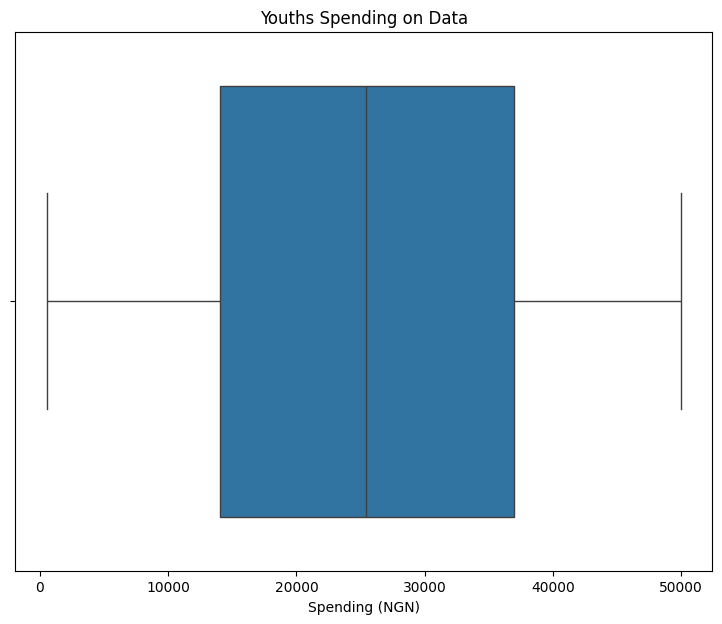

In [ ]:
#Setting a size
plt.figure(figsize = (9, 7))
sns.boxplot(x = data["Spending (NGN)"])

#Adding a Title
plt.title("Youths Spending on Data")

#Adding a label to the x-axis
plt.xlabel("Spending (NGN)")

# Saving the plot
plt.savefig("Youths Spending on Data.png")

#Displaying the plot
plt.show()

#### B. Bar Chart Visualization on Monthly Data by States:

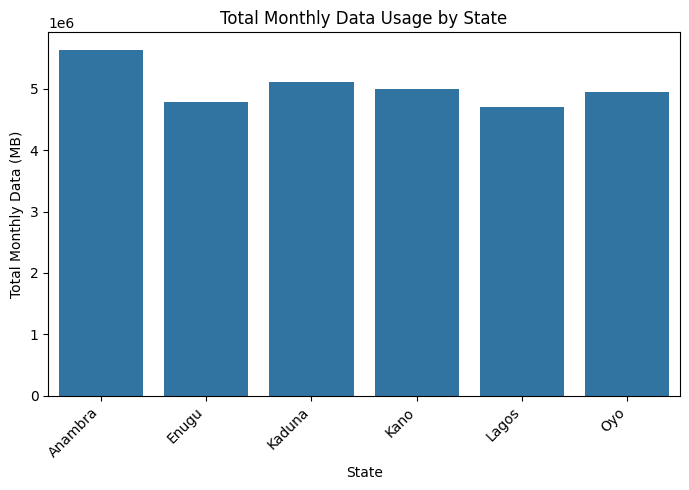

In [ ]:

#Grouping the data by "State" and sum the "Monthly Data (MB)
Monthly_Data_By_State = data.groupby("State")["Monthly Data (MB)"].sum().reset_index()

# Giving a size
plt.figure(figsize = (7, 5))
sns.barplot(x = "State", y = "Monthly Data (MB)", data = Monthly_Data_By_State)

# Adding a Title
plt.title("Total Monthly Data Usage by State")

#Adding labels to x and y-axis
plt.xlabel("State")
plt.ylabel("Total Monthly Data (MB)")

# Rotating the labels on x-axis to prevent overlapping
plt.xticks(rotation = 45, ha = "right")

# Adjusting Layout so labels don't cut off
plt.tight_layout()

# Saving the plot
plt.savefig("Total Monthly Data Usage by State.png")

# Displayimg the Chart
plt.show()

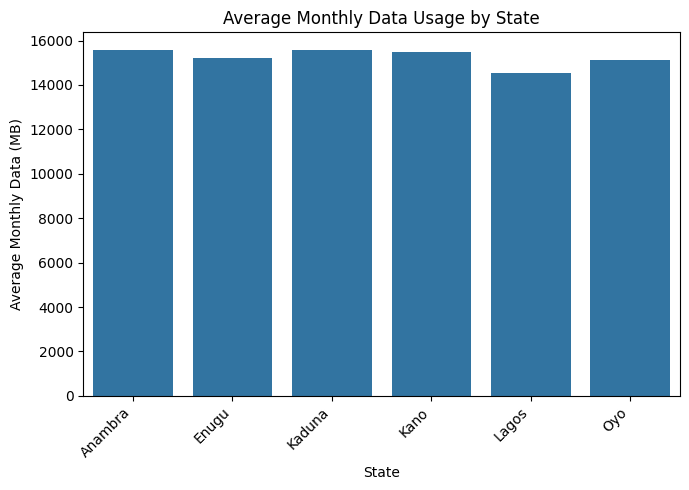

In [ ]:

#Grouping the data by "State" and sum the "Monthly Data (MB)
Monthly_Data_By_State = data.groupby("State")["Monthly Data (MB)"].mean().reset_index()

# Giving a size
plt.figure(figsize = (7, 5))
sns.barplot(x = "State", y = "Monthly Data (MB)", data = Monthly_Data_By_State)

# Adding a Title
plt.title("Average Monthly Data Usage by State")

#Adding labels to x and y-axis
plt.xlabel("State")
plt.ylabel("Average Monthly Data (MB)")

# Rotating the labels on x-axis to prevent overlapping
plt.xticks(rotation = 45, ha = "right")

# Adjusting Layout so labels don't cut off
plt.tight_layout()

# Saving the plot
plt.savefig("Average Monthly Data Usage by State.png")
# Displayimg the Chart
plt.show()

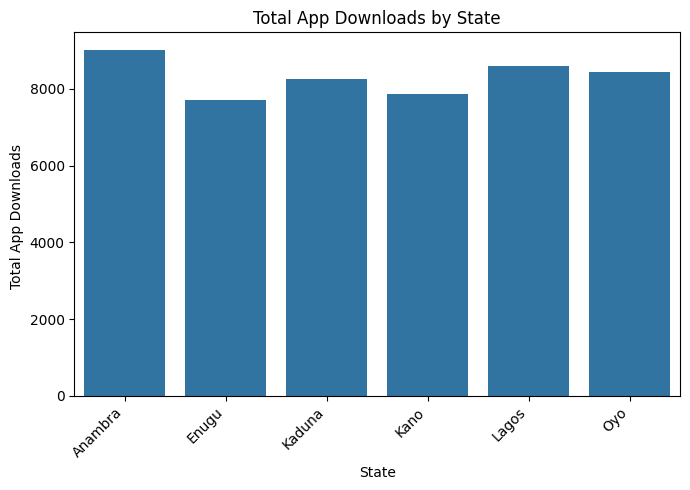

In [ ]:

#Grouping the data by "State" and sum the "Monthly Data (MB)
App_Downloads_By_State = data.groupby("State")["App Downloads"].sum().reset_index()

# Giving a size
plt.figure(figsize = (7, 5))
sns.barplot(x = "State", y = "App Downloads", data = App_Downloads_By_State)

# Adding a Title
plt.title("Total App Downloads by State")

#Adding labels to x and y-axis
plt.xlabel("State")
plt.ylabel("Total App Downloads ")

# Rotating the labels on x-axis to prevent overlapping
plt.xticks(rotation = 45, ha = "right")

# Adjusting Layout so labels don't cut off
plt.tight_layout()

# Saving the plot
plt.savefig("Total App Downloads by State.png")
# Displayimg the Chart
plt.show()

In [ ]:
# Exporting dataset to Excel

data.to_excel("Cleaned Mobile Data Usage.xlsx", index = False)
thOutliers.to_excel("Threshold Outliers.xlsx", index = False)
ageOutliers.to_excel("Age Outliers.xlsx", index = False)

#### C. Providing Insights to TechTrendNG:

> From the given dataset, after thorough cleaning and transformation, the analysis drawn is that the the state with the highest data usage is ANAMBRA state with the youths spending more on data and using more data than any other state.
> Even from the angle of Total Apps being downloaded by each state, Anambra still tops the chart, with Lagos trailing behind.

> So I would recommend that TechTrendNG target Anambra youths as their immediate audience in the aim of building/developing apps if the aim is to acquire users, and possibly,generate more revenue.